In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import json
%matplotlib inline

In [4]:
# ls data

In [5]:
import gpxpy
import gpxpy.gpx

# Parsing an existing file:
# -------------------------

gpx_file = open('./test_suite/data/m1.gpx', 'r')

gpx = gpxpy.parse(gpx_file)
y = []
cc = 0
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            n = '{0}'.format(point.description)
            n = n.split(" ")
#             if cc == 0:
            y.append(int(n[0]))
#             else:
#                 y.append(int(n[0])+4)
            cc = cc + 1
y.insert(1,1)
y.insert(2,8)
y.append(0)
print (y)
#             print('At Location ({0},{1}) height {2} => speed {3} => speed {4}'.format(point.latitude, point.longitude, point.elevation, point.speed,point.description))

[0, 1, 8, 24, 27, 28, 27, 28, 29, 29, 29, 32, 34, 37, 40, 45, 49, 50, 46, 44, 37, 30, 40, 42, 51, 58, 55, 54, 61, 60, 56, 51, 48, 53, 49, 44, 38, 37, 40, 41, 41, 41, 39, 37, 38, 40, 43, 44, 47, 47, 45, 44, 41, 37, 36, 39, 43, 43, 47, 49, 40, 31, 33, 32, 35, 37, 36, 34, 26, 32, 26, 30, 32, 33, 38, 40, 42, 42, 38, 38, 43, 43, 46, 45, 43, 44, 43, 47, 44, 39, 36, 32, 24, 19, 24, 30, 32, 32, 20, 11, 14, 23, 22, 25, 14, 6, 0]


In [6]:
with open('./test_suite/data/m1.log') as f:
    f = f.readlines()

x = []
# y = []

# 630 seconds
for i in f:
    i = i.split("|")
    a = int(i[2])-276447695
    x.append(a)
x.insert(1,3)
x.insert(2,6)
x.insert(3,11)
#     y.append(float(i[3]))
# x.append(304)
fps = 0
video = cv2.VideoCapture("./test_suite/data/vh2.mp4")
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

print (len(x),len(y))
print(x,y)


Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.0
107 107
[0, 3, 6, 11, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98, 101, 104, 107, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 193, 196, 199, 202, 205, 208, 211, 214, 217, 220, 223, 226, 229, 232, 235, 238, 241, 244, 247, 250, 253, 256, 259, 262, 265, 268, 271, 274, 277, 280, 283, 286, 289, 292, 295, 298, 301, 304, 307, 310, 313, 316, 319, 322, 325, 328] [0, 1, 8, 24, 27, 28, 27, 28, 29, 29, 29, 32, 34, 37, 40, 45, 49, 50, 46, 44, 37, 30, 40, 42, 51, 58, 55, 54, 61, 60, 56, 51, 48, 53, 49, 44, 38, 37, 40, 41, 41, 41, 39, 37, 38, 40, 43, 44, 47, 47, 45, 44, 41, 37, 36, 39, 43, 43, 47, 49, 40, 31, 33, 32, 35, 37, 36, 34, 26, 32, 26, 30, 32, 33, 38, 40, 42, 42, 38, 38, 43, 43, 46, 45, 43, 44, 43, 47, 44, 39, 36, 32, 24, 19, 24, 30, 32, 32, 20, 11, 14, 23, 22, 25, 14, 6, 0]


In [7]:
count = 0
# count1 = 0
total_list = []
k = 1/fps
j = k
m = x[len(x)-1]
while True:
    arr3 = []
    if j > m:
        break
    a = np.interp(j,x,y)
    arr3.append(j)
    arr3.append(a)
    total_list.append(arr3)
    j = j + k
    count += 1
with open('./test_suite/data/m1.json', 'w') as filehandle:  
    json.dump(total_list, filehandle)

### Grab Json Data

In [8]:
groundtruth = 0
with open('./test_suite/data/m1.json') as json_data:
    ground_truth = json.load(json_data)
    json_data.close()
    print(len(ground_truth))

9839


## Grab txt data (for new)

In [9]:
# F = open('./data/train.txt', 'r')
# # print(F.read())
# ground_truth = [x for x in F.read()]
# print(len(ground_truth))

### Save images to directory and write image paths to `driving.csv`

In [10]:
# with open('./data/driving.csv', 'w') as csvfile:
#     fieldnames = ['image_path', 'frame', 'speed']
#     writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
#     writer.writeheader()
    
#     # Path to raw image folder
#     abs_path_to_IMG = os.path.join('./data/IMG/')
    
#     cap = cv2.VideoCapture('./data/train.mp4')
#     cap.set(cv2.CAP_PROP_FRAME_COUNT, len(ground_truth))
# #     cap.set(cv2.CAP_PROP_FPS, 11.7552) #11.7552


#     for idx, item in enumerate(ground_truth):
        
#         cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
#         # read in the image
#         success, image = cap.read()
#         if success:
#             image_path = os.path.join('./data/IMG/', str(idx) + '.jpg')
            
#             # save image to IMG folder
#             cv2.imwrite(image_path, image)
            
#             # write row to driving.csv
#             writer.writerow({'image_path': image_path,
#                      'frame': idx,
#                      'speed':item[1],
#                     })
# print('done!')

9839
done!


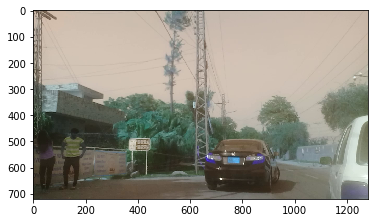

In [29]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

with open('./test_suite/data/m1.csv', 'w') as csvfile:
    fieldnames = ['image_path', 'time', 'speed']
    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
    writer.writeheader()
    
    # Path to raw image folder
    abs_path_to_IMG = os.path.join('./test_suite/data/IMGm1/')
    
    cap = cv2.VideoCapture('./test_suite/data/m1.mp4')
    cap.set(cv2.CAP_PROP_FRAME_COUNT, len(ground_truth))
#     cap.set(cv2.CAP_PROP_FPS, 11.7552) #11.7552
    print (len(ground_truth)) 

    for idx, item in enumerate(ground_truth):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        
        # read in the image
        success, image = cap.read()
       
        image = cv2.flip(image, 0)
        image = np.fliplr(image)
        plt.imshow(image)
        if success:
            image_path = os.path.join('./test_suite/data/IMGm1/', str(item[0]) + '.jpg')
            
            # save image to IMG folder
            cv2.imwrite(image_path, image)
            
            # write row to train_driving.csv
            writer.writerow({'image_path': image_path, 
                     'time':item[0],
                     'speed':item[1],
                    })
print('done!')

9840
281.36666666667486.jpg


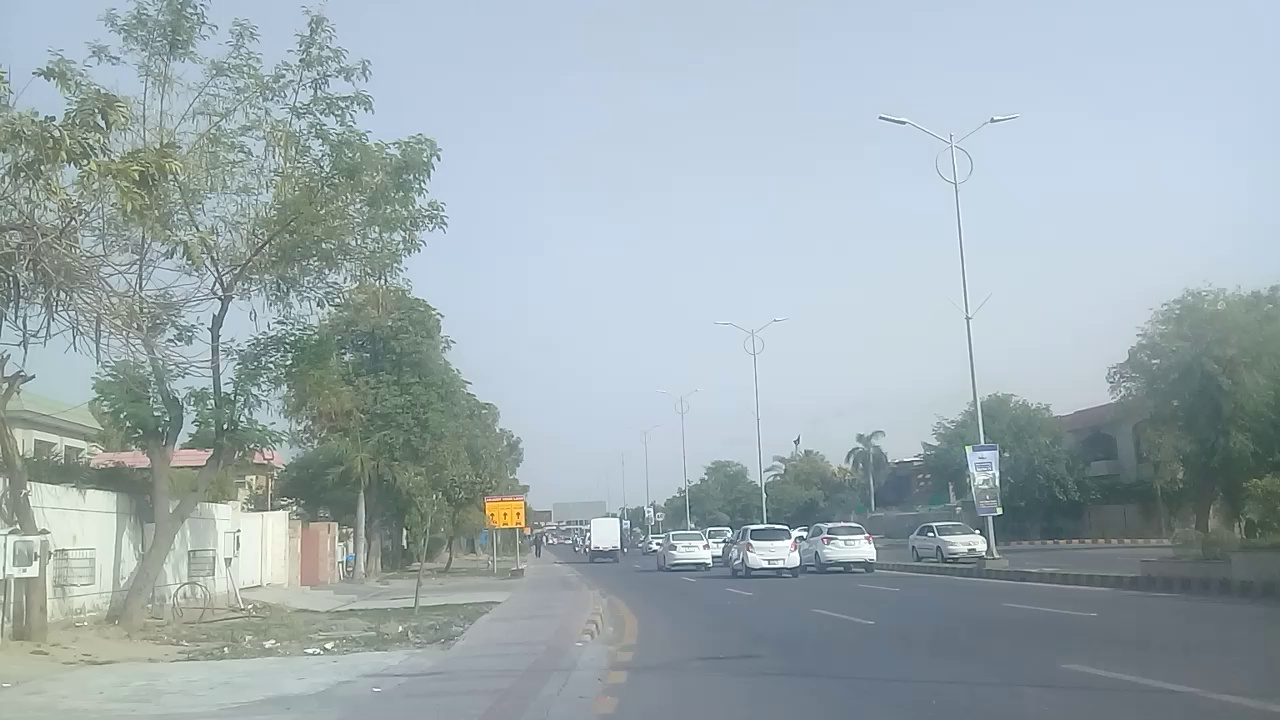

In [1]:
import os
# listOfFiles = os.listdir('./test_suite/data/IMG')
# print (len(listOfFiles))
m = os.listdir("./test_suite/data/IMGm1")
print (len(m))
print (m[12])
from IPython.display import Image
Image(filename='./test_suite/data/IMGm1/0.03333333333333333.jpg')

In [13]:
# import cv2
# j = 0
# for i in listOfFiles:
#     print (i)
#     j += 1
#     if j == 2:
#         break
#     cv2.show
import cv2
img = cv2.imread('./test_suite/data/IMGv1/73.23990657324235.jpg')
# image_cropped = img[100:440, :-90]

# from IPython.display import Image
# Image(filename=image_cropped)

In [4]:
!nvidia-smi

Sun May  5 14:52:46 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:83:00.0 Off |                    0 |
| N/A   37C    P0    57W / 149W |  11019MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K80           Off  | 00000000:84:00.0 Off |                    0 |
| N/A   31C    P0    70W / 149W |     71MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        